# SVM (Support Vector Machine)

In [10]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

In [11]:
# for sklearn 0.18's alternative syntax
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
if Version(sklearn_version) < '0.18':
    from sklearn.grid_search import train_test_split
else:
    from sklearn.model_selection import train_test_split
#############################################################################
print(50 * '=')
print('Section: First steps with scikit-learn')
print(50 * '-')

Section: First steps with scikit-learn
--------------------------------------------------


## 載入鳶尾花(iris)的dataset，並切割成測試集與訓練集
Loading the dataset of the iris and divided into testing set and training set.

In [12]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
fig = plt.gcf()
fig.set_size_inches(12, 9)

Class labels: [0 1 2]


<Figure size 864x648 with 0 Axes>

## 畫出區分的區域
Draw the area of the decision


In [13]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')


X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

## 使用kernel funtion中的Linear Kernel來劃分超平面
Using the Linear kernel in kernel funtion to find separating hyperplanes in higher dimensional space

Section: Dealing with the nonlinearlyseparable case using slack variables
--------------------------------------------------


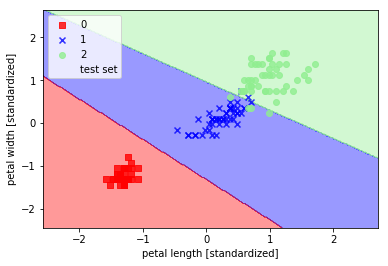

In [14]:
print(50 * '=')
print('Section: Dealing with the nonlinearly'
      'separable case using slack variables')
print(50 * '-')

svm = SVC(kernel='linear', C=10.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## 使用kernel funtion中的RBF kernel(Radial basis function)來劃分超平面
Using the RBF kernel in kernel funtion to find separating hyperplanes in higher dimensional space

Section: Using the kernel trick to find separating hyperplanesin higher dimensional space
--------------------------------------------------


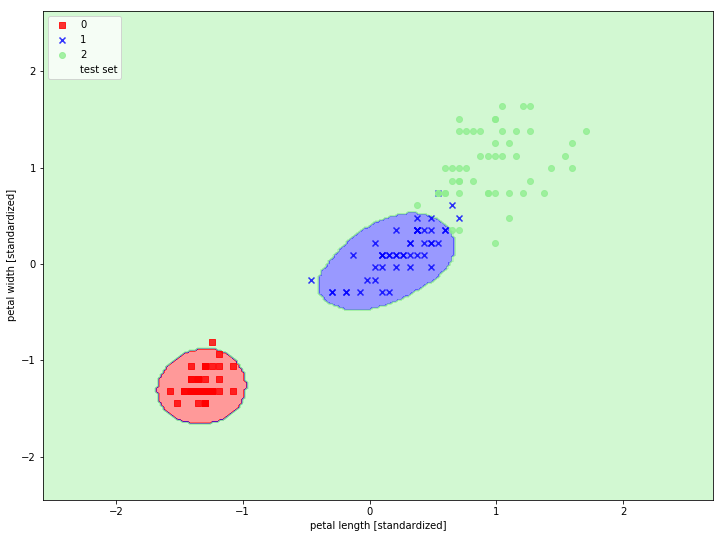

In [15]:
print(50 * '=')
print('Section: Using the kernel trick to find separating hyperplanes'
      'in higher dimensional space')
print(50 * '-')


svm = SVC(kernel='rbf', random_state=0, gamma=10, C=0.10)
svm.fit(X_train_std, y_train)
fig = plt.gcf()
fig.set_size_inches(12, 9)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
# plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_iris_1.png', dpi=300)
plt.show()



## 將參數C調升至10，則對應到較大的錯誤懲罰(較嚴格)
Large values of C correspond to large error penalties

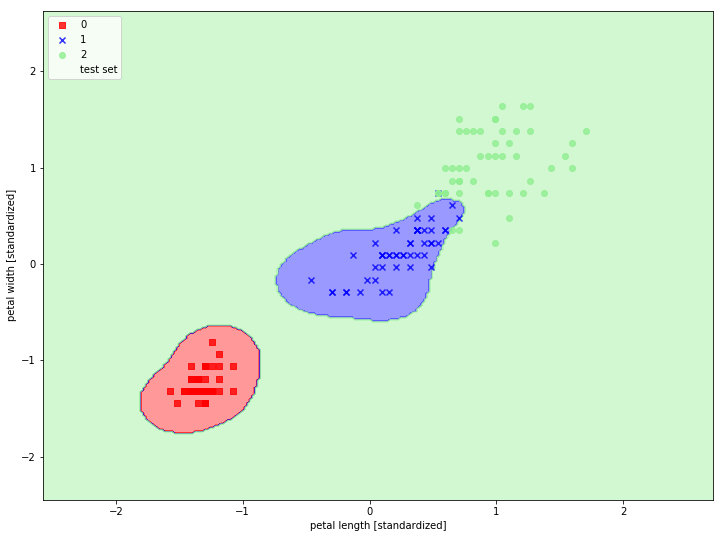

In [16]:
svm = SVC(kernel='rbf', random_state=0, gamma=10.0, C=10.0)
svm.fit(X_train_std, y_train)
fig = plt.gcf()
fig.set_size_inches(12, 9)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## 將參數gamma調降至0.1,會增加受影響的訓練樣本的範圍，導致決策邊界更加寬鬆
Decreasing the parameter gamma to 0.1 will increase the range of affected training samples, decision boundary of the
RBF kernel SVM model will be relatively soft.

Section: Using the kernel trick to find separating hyperplanesin higher dimensional space. gamma parameter
--------------------------------------------------


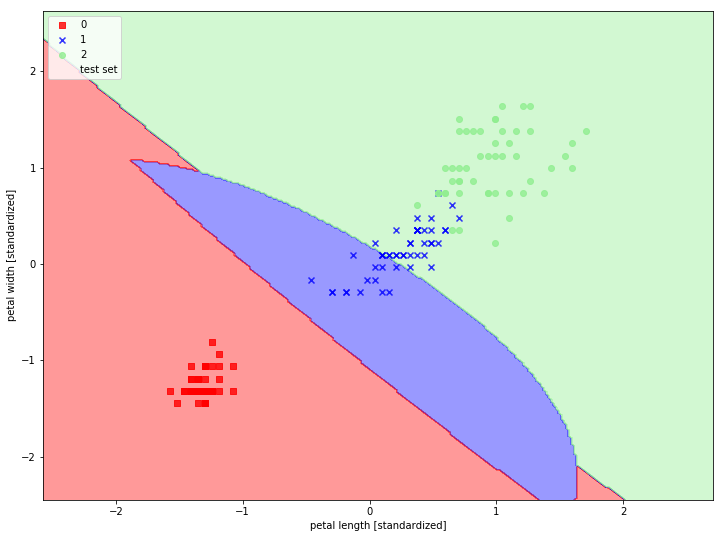

In [17]:
print(50 * '=')
print('Section: Using the kernel trick to find separating hyperplanes'
      'in higher dimensional space. gamma parameter')
print(50 * '-')


svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=0.10)
svm.fit(X_train_std, y_train)
fig = plt.gcf()
fig.set_size_inches(12, 9)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## 再將參數C調升至10
Then increase the parameter C to 10

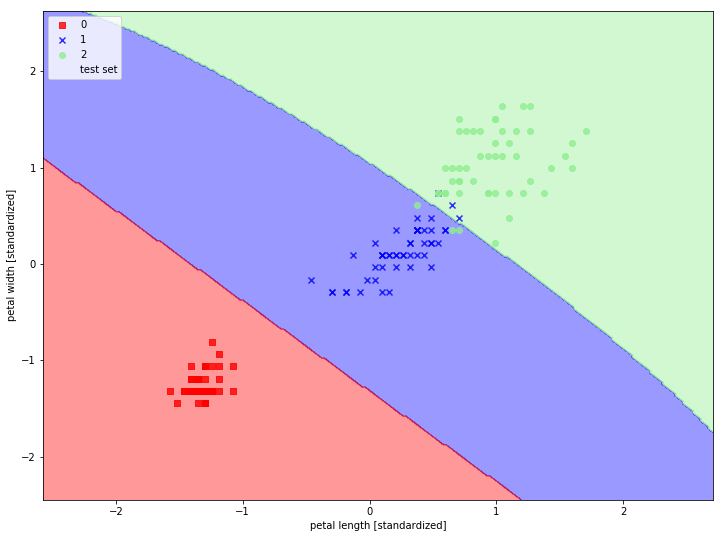

In [18]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10)
svm.fit(X_train_std, y_train)
fig = plt.gcf()
fig.set_size_inches(12, 9)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## 將參數gamma大幅調升至1000，決策邊界與類別0和1更加緊密，但也可能造成overfitting
Raise the parameter gamma to 1000,we can now see that the decision boundary around the classes 0 and 1 is much tighter using a relatively large value of gamma, but it can also cause overfitting.

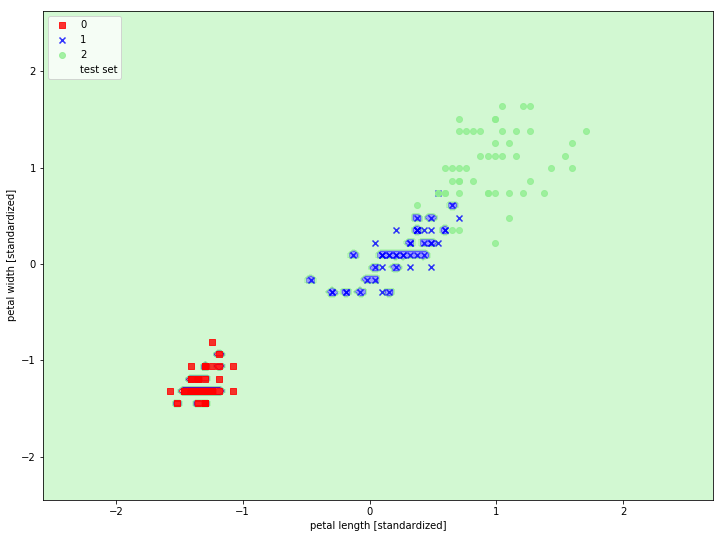

In [19]:
svm = SVC(kernel='rbf', random_state=0, gamma=1000, C=10)
svm.fit(X_train_std, y_train)
fig = plt.gcf()
fig.set_size_inches(12, 9)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()